In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from  scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.stats import pearsonr, spearmanr
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
import matplotlib.cm as cm

In [2]:
pwd()

'/Users/ritesh/Desktop/Multi_axis-Plasticity-Github-main'

## Preprocessing

In [3]:
exp_data = pd.read_csv('RACIPE_output/a_new_network_solution.dat', sep='\t', header=None)
exp_data.columns = ["Model_Number", "Number_of_Steady_States", "Runs_that_converged_to_steady_state", 
                    "OCT4", "miR145", "AMPK", "HIF1", "miR200", "mtROS", "noxROS", "SNAIL", "ZEB", 
                    "BACH1","RKIP", "SLUG", "CDH1", "Nrf2", "ERa36", "ERa66", "Gata3", "let7", "PD_L1",
                    "Pgr", "Foxa1", "LIN28", "miR34", "np63"]
exp_data

,Model_Number,Number_of_Steady_States,Runs_that_converged_to_steady_state,OCT4,miR145,AMPK,HIF1,miR200,mtROS,noxROS,...,ERa36,ERa66,Gata3,let7,PD_L1,Pgr,Foxa1,LIN28,miR34,np63
0,1,6,57,-4.247256,1.223306,-9.213723,-10.481431,-5.145673,-5.403197,-5.048925,...,7.013079,-19.738626,-3.342506,-18.165797,-6.050346,-15.302690,1.358031,7.184268,-2.358317,-1.202819
1,1,6,12,2.634096,-3.614416,-9.213724,-10.489682,-7.990507,-5.403197,-5.048944,...,7.013073,-14.297125,-3.340829,-18.170342,-1.949474,-15.278334,1.358031,7.184268,-6.736005,-4.023978
2,1,6,8,-10.301662,6.743391,-9.213724,-10.568748,-1.252280,-5.403197,-5.048945,...,7.013078,-16.525237,-3.342178,-18.170043,-11.005908,-13.849954,1.358031,7.184266,-5.691717,-7.684458
3,1,6,9,-4.247256,1.223306,-9.213637,-10.482011,-5.144727,-5.403195,-5.045057,...,7.013079,-19.739186,-3.342506,-11.601665,-6.050347,-15.302690,1.358031,7.184268,-0.805807,-1.202815
4,1,6,9,2.668234,-3.614463,-9.213724,-10.480988,-5.242251,-5.403197,-5.048944,...,7.013079,-19.682316,-3.342504,-18.170201,-1.930269,-15.303938,1.358031,7.184268,-3.929191,-1.202973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71206,10000,8,28,-13.165270,7.811838,-0.016989,-17.569549,11.275604,6.765772,-5.397713,...,1.381384,-8.294858,3.059033,4.962953,-15.132441,-12.015467,0.560675,-9.872565,6.856553,1.885341
71207,10000,8,8,-13.165270,7.811838,-0.016989,-17.568256,5.611314,6.765772,-5.397713,...,1.383542,-11.416862,3.059004,4.962882,-15.063021,-12.454625,0.560674,-9.699911,6.856553,6.231632
71208,10000,8,10,-3.661369,2.758274,-0.297921,-14.110195,1.011702,0.511559,-11.552964,...,1.842609,-17.637890,3.059004,3.876377,-11.996983,-11.533336,0.560674,1.708051,0.912284,6.232503
71209,10000,8,16,-13.165271,7.811838,-0.016989,-23.096724,11.275636,6.765772,-5.397713,...,-9.483298,11.364971,7.387969,8.922314,-25.513147,3.742831,6.395047,-9.905339,6.856553,1.883067


In [4]:
exp_data.columns

Index(['Model_Number', 'Number_of_Steady_States',
       'Runs_that_converged_to_steady_state', 'OCT4', 'miR145', 'AMPK', 'HIF1',
       'miR200', 'mtROS', 'noxROS', 'SNAIL', 'ZEB', 'BACH1', 'RKIP', 'SLUG',
       'CDH1', 'Nrf2', 'ERa36', 'ERa66', 'Gata3', 'let7', 'PD_L1', 'Pgr',
       'Foxa1', 'LIN28', 'miR34', 'np63'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(exp_data.iloc[:, 3:])
exp_data.iloc[:, 3:] = std_data
exp_data

,Model_Number,Number_of_Steady_States,Runs_that_converged_to_steady_state,OCT4,miR145,AMPK,HIF1,miR200,mtROS,noxROS,...,ERa36,ERa66,Gata3,let7,PD_L1,Pgr,Foxa1,LIN28,miR34,np63
0,1,6,57,-0.022463,-0.109285,-2.472863,-0.973677,-0.531060,-0.871215,-1.205837,...,0.868421,-0.883623,-1.908506,-1.599443,-0.236708,-1.280859,-0.638647,1.010241,-0.900542,-0.184503
1,1,6,12,0.740007,-1.050211,-2.472863,-0.974806,-0.865800,-0.871215,-1.205843,...,0.868420,-0.469868,-1.907989,-1.600039,0.226040,-1.277769,-0.638647,1.010241,-1.817045,-0.709846
2,1,6,8,-0.693306,0.964359,-2.472863,-0.985620,-0.072942,-0.871215,-1.205843,...,0.868421,-0.639287,-1.908405,-1.600000,-0.795901,-1.096582,-0.638647,1.010240,-1.598415,-1.391483
3,1,6,9,-0.022463,-0.109285,-2.472834,-0.973757,-0.530949,-0.871215,-1.204789,...,0.868421,-0.883665,-1.908506,-0.737999,-0.236708,-1.280859,-0.638647,1.010241,-0.575512,-0.184502
4,1,6,9,0.743790,-1.050220,-2.472863,-0.973617,-0.542424,-0.871215,-1.205843,...,0.868421,-0.879341,-1.908505,-1.600021,0.228207,-1.281017,-0.638647,1.010241,-1.229417,-0.184531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71206,10000,8,28,-1.010600,1.172169,0.636489,-1.943144,1.401159,1.693868,-1.300361,...,-0.114331,-0.013475,0.062978,1.435859,-1.261545,-0.863880,-0.910185,-1.563621,1.028662,0.390560
71207,10000,8,8,-1.010600,1.172169,0.636489,-1.942968,0.734667,1.693868,-1.300361,...,-0.113954,-0.250862,0.062969,1.435849,-1.253711,-0.919586,-0.910185,-1.537568,1.028662,1.199905
71208,10000,8,10,0.042455,0.189262,0.541507,-1.469996,0.193451,0.375550,-2.968469,...,-0.033845,-0.723889,0.062969,1.293262,-0.907735,-0.802722,-0.910185,0.183884,-0.215816,1.200068
71209,10000,8,16,-1.010600,1.172169,0.636489,-2.699116,1.401162,1.693868,-1.300361,...,-2.010258,1.481396,1.396161,1.955466,-2.432918,1.135037,1.076698,-1.568567,1.028662,0.390136


In [6]:
exp_data.columns

Index(['Model_Number', 'Number_of_Steady_States',
       'Runs_that_converged_to_steady_state', 'OCT4', 'miR145', 'AMPK', 'HIF1',
       'miR200', 'mtROS', 'noxROS', 'SNAIL', 'ZEB', 'BACH1', 'RKIP', 'SLUG',
       'CDH1', 'Nrf2', 'ERa36', 'ERa66', 'Gata3', 'let7', 'PD_L1', 'Pgr',
       'Foxa1', 'LIN28', 'miR34', 'np63'],
      dtype='object')

## Defining Score and correlation analysis

In [7]:
exp_data['mesenchymal score'] = (exp_data['ZEB'] + exp_data['SLUG'])/2
exp_data['epithelial score'] = (exp_data['miR200'] + exp_data['CDH1'])/2
exp_data["EMT_score"] = (exp_data["ZEB"] + exp_data["SLUG"] - exp_data["miR200"] - exp_data["CDH1"]) / 4

exp_data['luminal score'] = (exp_data['ERa66'] + exp_data['Gata3'] + exp_data['Pgr'] + exp_data['Foxa1'])/4
exp_data['basal score'] = (exp_data['SLUG'] + exp_data['np63'])/2
exp_data["Luminal-Basal Score"] = (exp_data["luminal score"] - exp_data["basal score"])

exp_data["Glycolysis_score"] = (exp_data["HIF1"] + exp_data["noxROS"]) / 2
exp_data["OxPhos_score"] = (exp_data["AMPK"] + exp_data["mtROS"]) / 2
exp_data["Resistance score"] = exp_data['ERa36'] - exp_data['ERa66']

exp_data["SN_score"] = ((exp_data["OCT4"] + exp_data["LIN28"] - exp_data["miR145"] - exp_data["let7"])/4) # type: ignore
exp_data

,Model_Number,Number_of_Steady_States,Runs_that_converged_to_steady_state,OCT4,miR145,AMPK,HIF1,miR200,mtROS,noxROS,...,mesenchymal score,epithelial score,EMT_score,luminal score,basal score,Luminal-Basal Score,Glycolysis_score,OxPhos_score,Resistance score,SN_score
0,1,6,57,-0.022463,-0.109285,-2.472863,-0.973677,-0.531060,-0.871215,-1.205837,...,1.172530,-0.564822,0.868676,-1.177909,0.399235,-1.577144,-1.089757,-1.672039,1.752044,0.674126
1,1,6,12,0.740007,-1.050211,-2.472863,-0.974806,-0.865800,-0.871215,-1.205843,...,0.809751,-0.540369,0.675060,-1.073568,-0.153896,-0.919672,-1.090324,-1.672039,1.338289,1.100125
2,1,6,8,-0.693306,0.964359,-2.472863,-0.985620,-0.072942,-0.871215,-1.205843,...,0.017694,0.465023,-0.223665,-1.070730,-0.742692,-0.328038,-1.095731,-1.672039,1.507708,0.238144
3,1,6,9,-0.022463,-0.109285,-2.472834,-0.973757,-0.530949,-0.871215,-1.204789,...,1.165721,-0.564767,0.865244,-1.177919,0.399302,-1.577221,-1.089273,-1.672024,1.752087,0.458765
4,1,6,9,0.743790,-1.050220,-2.472863,-0.973617,-0.542424,-0.871215,-1.205843,...,1.188035,-0.607211,0.897623,-1.176878,0.396755,-1.573632,-1.089730,-1.672039,1.747762,1.101068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71206,10000,8,28,-1.010600,1.172169,0.636489,-1.943144,1.401159,1.693868,-1.300361,...,-0.451455,0.920844,-0.686149,-0.431140,0.063513,-0.494654,-1.621753,1.165178,-0.100855,-1.295562
71207,10000,8,8,-1.010600,1.172169,0.636489,-1.942968,0.734667,1.693868,-1.300361,...,0.144711,0.255815,-0.055552,-0.504416,1.051094,-1.555511,-1.621664,1.165178,0.136908,-1.289047
71208,10000,8,10,0.042455,0.189262,0.541507,-1.469996,0.193451,0.375550,-2.968469,...,0.797652,-0.378039,0.587846,-0.593457,1.212187,-1.805644,-2.219233,0.458529,0.690044,-0.314046
71209,10000,8,16,-1.010600,1.172169,0.636489,-2.699116,1.401162,1.693868,-1.300361,...,-1.297674,1.267600,-1.282637,1.272323,-0.507096,1.779419,-1.999738,1.165178,-3.491654,-1.426700


In [8]:
scores_req = ['EMT_score', 'Glycolysis_score', "SN_score", 'OxPhos_score', "Resistance score", "luminal score", "basal score", "Luminal-Basal Score", "RKIP", "BACH1", "PD_L1"]

len(scores_req)
df_r_values = pd.DataFrame(index = ["RKIP", "BACH1"], columns = scores_req)
df_p_values = pd.DataFrame(index = ["RKIP", "BACH1"], columns = scores_req)
df_r_values

,EMT_score,Glycolysis_score,SN_score,OxPhos_score,Resistance score,luminal score,basal score,Luminal-Basal Score,RKIP,BACH1,PD_L1
RKIP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BACH1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in scores_req:
    for j in scores_req:
        # print(i, j)
        r, p = spearmanr(exp_data[i], exp_data[j])
        df_r_values.loc[i, j] = r
        df_p_values.loc[i, j] = p

df_r_values

,EMT_score,Glycolysis_score,SN_score,OxPhos_score,Resistance score,luminal score,basal score,Luminal-Basal Score,RKIP,BACH1,PD_L1
RKIP,-0.449008,-0.211479,-0.580305,0.533511,-0.238119,0.054763,-0.12798,0.096527,1.0,-0.642425,-0.463859
BACH1,0.485827,0.208695,0.553746,-0.463171,0.352513,-0.176736,0.308999,-0.274485,-0.642425,1.0,0.462592
EMT_score,1.0,0.44628,0.791161,-0.639509,0.707257,-0.538833,0.737506,-0.744378,-0.449008,0.485827,0.857345
Glycolysis_score,0.44628,1.0,0.314573,-0.386936,0.233674,-0.109787,0.327298,-0.242902,-0.211479,0.208695,0.487345
SN_score,0.791161,0.314573,1.0,-0.588492,0.555781,-0.341643,0.444013,-0.452623,-0.580305,0.553746,0.819845
OxPhos_score,-0.639509,-0.386936,-0.588492,1.0,-0.278829,0.103922,-0.276013,0.214665,0.533511,-0.463171,-0.581242
Resistance score,0.707257,0.233674,0.555781,-0.278829,1.0,-0.80531,0.632658,-0.822504,-0.238119,0.352513,0.646515
luminal score,-0.538833,-0.109787,-0.341643,0.103922,-0.80531,1.0,-0.532616,0.832413,0.054763,-0.176736,-0.482007
basal score,0.737506,0.327298,0.444013,-0.276013,0.632658,-0.532616,1.0,-0.894608,-0.12798,0.308999,0.554888
Luminal-Basal Score,-0.744378,-0.242902,-0.452623,0.214665,-0.822504,0.832413,-0.894608,1.0,0.096527,-0.274485,-0.593972


In [10]:
df_p_values

,EMT_score,Glycolysis_score,SN_score,OxPhos_score,Resistance score,luminal score,basal score,Luminal-Basal Score,RKIP,BACH1,PD_L1
RKIP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BACH1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EMT_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Glycolysis_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SN_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OxPhos_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Resistance score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
luminal score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
basal score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Luminal-Basal Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_r_values = df_r_values.astype(float)
df_r_values = df_r_values.round(2)
df_r_values

,EMT_score,Glycolysis_score,SN_score,OxPhos_score,Resistance score,luminal score,basal score,Luminal-Basal Score,RKIP,BACH1,PD_L1
RKIP,-0.45,-0.21,-0.58,0.53,-0.24,0.05,-0.13,0.10,1.00,-0.64,-0.46
BACH1,0.49,0.21,0.55,-0.46,0.35,-0.18,0.31,-0.27,-0.64,1.00,0.46
EMT_score,1.00,0.45,0.79,-0.64,0.71,-0.54,0.74,-0.74,-0.45,0.49,0.86
Glycolysis_score,0.45,1.00,0.31,-0.39,0.23,-0.11,0.33,-0.24,-0.21,0.21,0.49
SN_score,0.79,0.31,1.00,-0.59,0.56,-0.34,0.44,-0.45,-0.58,0.55,0.82
OxPhos_score,-0.64,-0.39,-0.59,1.00,-0.28,0.10,-0.28,0.21,0.53,-0.46,-0.58
Resistance score,0.71,0.23,0.56,-0.28,1.00,-0.81,0.63,-0.82,-0.24,0.35,0.65
luminal score,-0.54,-0.11,-0.34,0.10,-0.81,1.00,-0.53,0.83,0.05,-0.18,-0.48
basal score,0.74,0.33,0.44,-0.28,0.63,-0.53,1.00,-0.89,-0.13,0.31,0.55
Luminal-Basal Score,-0.74,-0.24,-0.45,0.21,-0.82,0.83,-0.89,1.00,0.10,-0.27,-0.59


In [12]:
def add_significance_markers(value, p_value):
    if p_value < 0.001:
        return str(f"{value: .3f}***")
    elif p_value < 0.01:
        return str(f"{value: .3f}**")
    elif p_value < 0.05:
        return str(f"{value: .3f}*")
    else:
        return str(f"{value: .3f}")     

In [13]:
# Convert r_values_luminal to numeric type
r_value_numeric = df_r_values.apply(pd.to_numeric)

annot_matrix = pd.DataFrame(
    r_value_numeric,  # Use the values of df_random
).copy()

for row in r_value_numeric.index:
    for col in r_value_numeric.columns:
        annot_matrix.at[row, col] = add_significance_markers(r_value_numeric.loc[row, col], df_p_values.loc[row, col])

/var/folders/kl/lmprrv7x4jxczg7pfbq62wxm0000gn/T/ipykernel_15709/2079493532.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.450***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_matrix.at[row, col] = add_significance_markers(r_value_numeric.loc[row, col], df_p_values.loc[row, col])
/var/folders/kl/lmprrv7x4jxczg7pfbq62wxm0000gn/T/ipykernel_15709/2079493532.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.210***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_matrix.at[row, col] = add_significance_markers(r_value_numeric.loc[row, col], df_p_values.loc[row, col])
/var/folders/kl/lmprrv7x4jxczg7pfbq62wxm0000gn/T/ipykernel_15709/2079493532.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated 

In [14]:
annot_matrix

,EMT_score,Glycolysis_score,SN_score,OxPhos_score,Resistance score,luminal score,basal score,Luminal-Basal Score,RKIP,BACH1,PD_L1
RKIP,-0.450***,-0.210***,-0.580***,0.530***,-0.240***,0.050***,-0.130***,0.100***,1.000***,-0.640***,-0.460***
BACH1,0.490***,0.210***,0.550***,-0.460***,0.350***,-0.180***,0.310***,-0.270***,-0.640***,1.000***,0.460***
EMT_score,1.000***,0.450***,0.790***,-0.640***,0.710***,-0.540***,0.740***,-0.740***,-0.450***,0.490***,0.860***
Glycolysis_score,0.450***,1.000***,0.310***,-0.390***,0.230***,-0.110***,0.330***,-0.240***,-0.210***,0.210***,0.490***
SN_score,0.790***,0.310***,1.000***,-0.590***,0.560***,-0.340***,0.440***,-0.450***,-0.580***,0.550***,0.820***
OxPhos_score,-0.640***,-0.390***,-0.590***,1.000***,-0.280***,0.100***,-0.280***,0.210***,0.530***,-0.460***,-0.580***
Resistance score,0.710***,0.230***,0.560***,-0.280***,1.000***,-0.810***,0.630***,-0.820***,-0.240***,0.350***,0.650***
luminal score,-0.540***,-0.110***,-0.340***,0.100***,-0.810***,1.000***,-0.530***,0.830***,0.050***,-0.180***,-0.480***
basal score,0.740***,0.330***,0.440***,-0.280***,0.630***,-0.530***,1.000***,-0.890***,-0.130***,0.310***,0.550***
Luminal-Basal Score,-0.740***,-0.240***,-0.450***,0.210***,-0.820***,0.830***,-0.890***,1.000***,0.100***,-0.270***,-0.590***


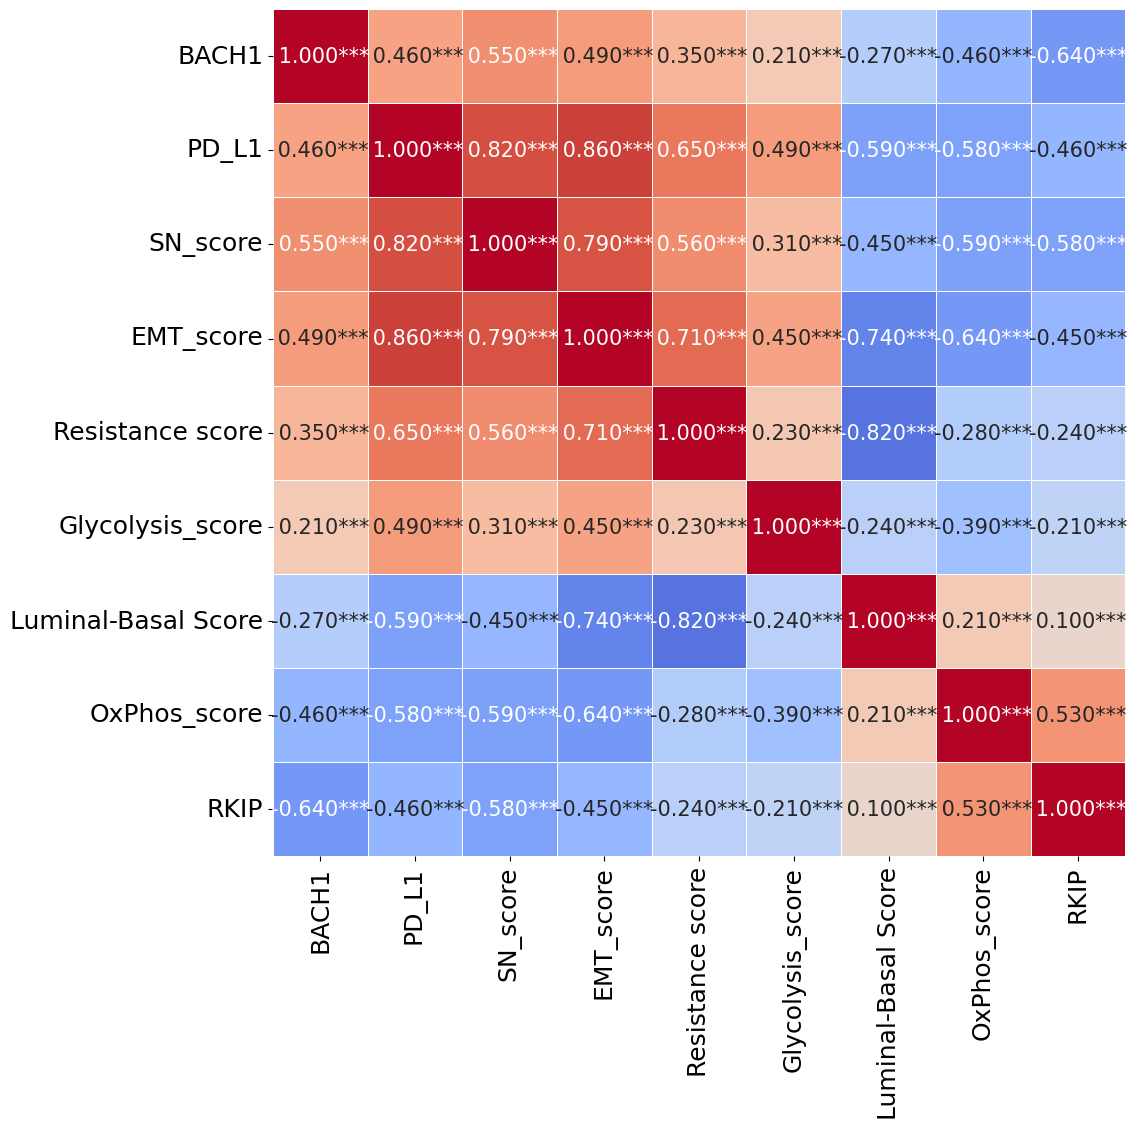

In [15]:
order = ["BACH1", "PD_L1", "SN_score", "EMT_score", "Resistance score", "Glycolysis_score", "Luminal-Basal Score", "OxPhos_score", "RKIP"]

df_r_values = df_r_values.loc[order, order]
df_p_values = df_p_values.loc[order, order]
annot_matrix = annot_matrix.loc[order, order]

plt.figure(figsize=(11, 11))
sns.heatmap(
    df_r_values.astype(float),  # Use numeric values for heatmap
    annot=annot_matrix,  # Use string annotations
    vmax= 1, vmin= -1,
    fmt='s',  # Use string format for annotations
    linewidths=0.5,
    cmap="coolwarm",
    annot_kws={"size": 15},
    cbar= False
)

# plt.title("Correlation Matrix from simulations")
plt.xticks(rotation=90, size=18)
plt.yticks(rotation=0, size=18)
# plt.savefig('RACIPE_output/heatmap_RKIP_BACH1.png', dpi=300, bbox_inches='tight')
plt.show()

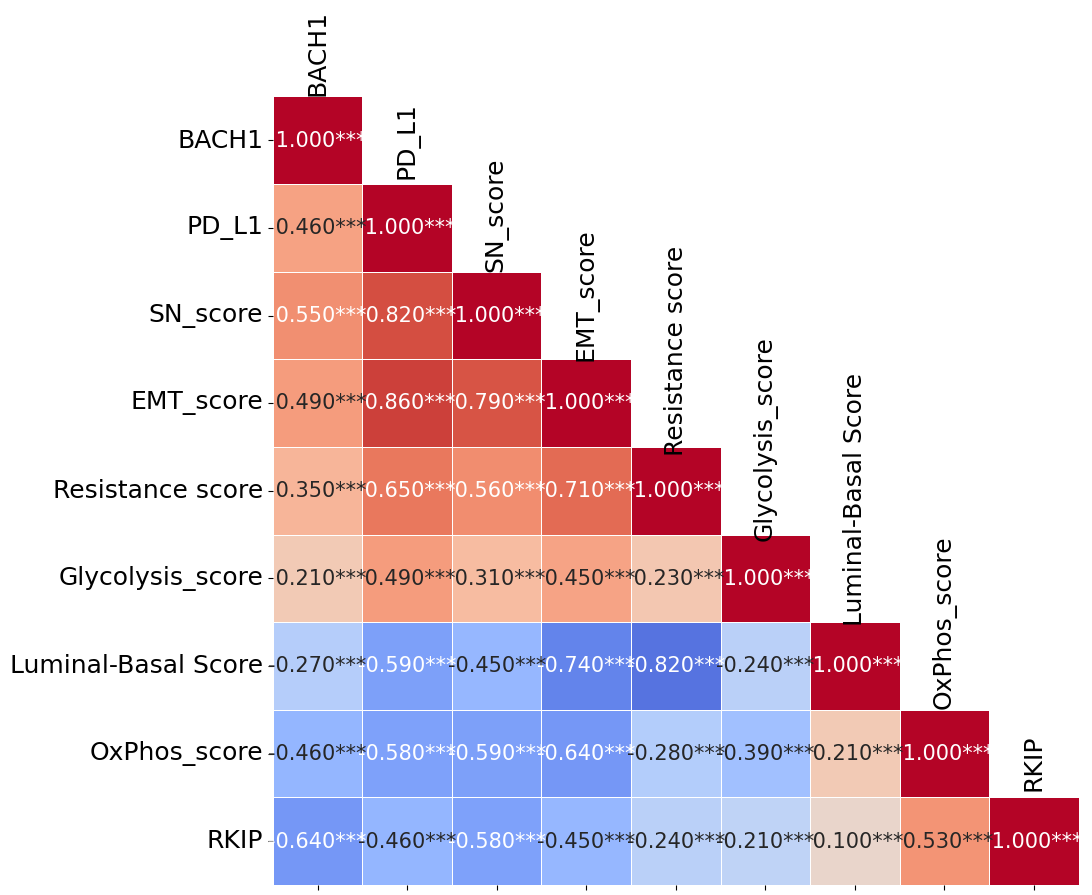

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

order = ["BACH1", "PD_L1", "SN_score", "EMT_score", "Resistance score",
         "Glycolysis_score", "Luminal-Basal Score", "OxPhos_score", "RKIP"]

# Reorder
df_r_values = df_r_values.loc[order, order]
df_p_values = df_p_values.loc[order, order]
annot_matrix = annot_matrix.loc[order, order]

# Create mask for upper triangle
mask = np.triu(np.ones_like(df_r_values, dtype=bool), k=1)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(
    df_r_values.astype(float),
    annot=annot_matrix,
    mask=mask,              # 👈 hide upper triangle
    vmax=1, vmin=-1,
    fmt='s',
    linewidths=0.5,
    cmap="coolwarm",
    annot_kws={"size": 15},
    cbar=False
)

# Remove default x labels
ax.set_xticklabels([])
ax.set_xlabel("")

# # Add diagonal x-axis labels manually
# for i, label in enumerate(order):
#     ax.text(i + 0.5, -0.5 + i/1.15, label, ha="right", va="center",
#             rotation=90, fontsize=18, transform=ax.transData)

#putting text on the corners
order = ["BACH1", "PD_L1", "SN_score", "EMT_score", "Resistance score",
         "Glycolysis_score", "Luminal-Basal Score", "OxPhos_score", "RKIP"]

ax.text(0.5, -0.5, "BACH1", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(1.5, 0.5, "PD_L1", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(2.5, 1.35, "SN_score", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(3.5, 2.26, "EMT_score", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(4.5, 2.9, "Resistance score", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(5.5, 3.9, "Glycolysis_score", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(6.5, 4.6, "Luminal-Basal Score", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(7.5, 6.00, "OxPhos_score", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
ax.text(8.5, 7.6, "RKIP", ha="center", va="center", rotation=90, fontsize=18, transform=ax.transData)
plt.grid(False)
# Y-axis labels stay as is
ax.set_yticklabels(order, rotation=0, fontsize=18)

plt.tight_layout()
plt.show()
